In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_moons


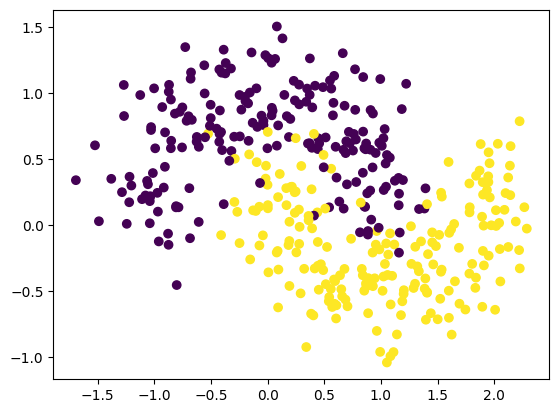

In [2]:
X,y = make_moons(n_samples = 400,noise = 0.25,random_state = 28)
plt.scatter(X[:,0],X[:,1],c=y)

In [3]:
print(X.shape)
print(y.shape)

(400, 2)
(400,)


In [4]:
y = y.reshape(1,-1)
X = X.T
y = tf.convert_to_tensor(y,dtype=tf.float32)
X = tf.convert_to_tensor(X,dtype=tf.float32)

In [5]:
print(X.shape)
print(y.shape)

(2, 400)
(1, 400)


In [6]:
def initialize_parameters(layer_dims):
  L = len(layer_dims)
  parameters = {}
  inializer = tf.keras.initializers.GlorotUniform()
  for l in range(1,L):
    parameters['W' + str(l)] = tf.Variable(inializer(shape=(layer_dims[l],layer_dims[l-1])))
    parameters['b' + str(l)] = tf.Variable(inializer(shape=(layer_dims[l],1)))

  return parameters



In [7]:
def forward_propagation(X,parameters):
  L = len(parameters)//2
  A = X
  for l in range(1,L):
    W = parameters['W' + str(l)]
    b = parameters['b'+str(l)]
    Z = tf.math.add(tf.linalg.matmul(W,A),b)
    A = tf.nn.relu(Z)
  W = parameters['W' + str(L)]
  b = parameters['b'+str(L)]
  Z = tf.math.add(tf.linalg.matmul(W,A),b)
  A = tf.math.sigmoid(Z)
  return A

In [8]:
def compute_total_loss(y_true,y_pred):
  total_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = y_true,logits = y_pred))
  return total_loss

In [9]:
def training(X,y,iterations,learning_rate,layer_dims):
  parameters = initialize_parameters(layer_dims)
  optimizer = tf.optimizers.Adam(learning_rate)
  for i in range(iterations):
    with tf.GradientTape() as tape:
      A_pred = forward_propagation(X,parameters)
      loss = compute_total_loss(y,A_pred)
    trainable_variables = parameters.values()
    grad = tape.gradient(loss,trainable_variables)
    optimizer.apply_gradients(zip(grad,trainable_variables))
    if i % 100 == 0:
      print(f"loss at {i} iteration: {loss}")
  return parameters


In [12]:
iteration = 1000
learning_rate = 0.1
layer_dims = [2,16,8,1]
parameters = training(X,y,iteration,learning_rate,layer_dims)

loss at 0 iteration: 0.7486228942871094
loss at 100 iteration: 0.5232747793197632
loss at 200 iteration: 0.5218138694763184
loss at 300 iteration: 0.5196336507797241
loss at 400 iteration: 0.5199282169342041
loss at 500 iteration: 0.5196213722229004
loss at 600 iteration: 0.520038366317749
loss at 700 iteration: 0.5233737826347351
loss at 800 iteration: 0.5232268571853638
loss at 900 iteration: 0.5232211351394653


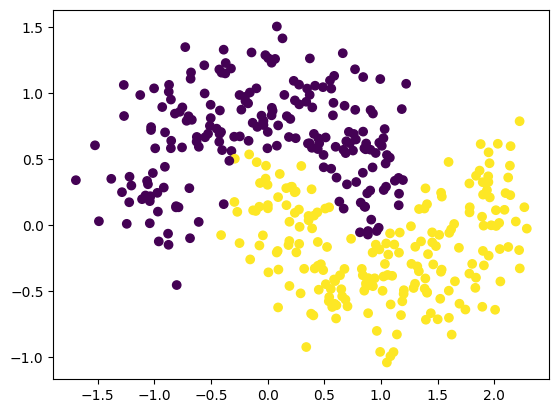

In [13]:
y_pred = forward_propagation(X,parameters)
y_pred = tf.cast(y_pred > 0.5,tf.float32)
plt.scatter(X[0,:],X[1,:],c=y_pred[0,:])



```
Quite similar with y_true
```

